In [81]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
from sklearn.metrics import matthews_corrcoef
import itertools

In [82]:
#loading data
train_path = "/content/train.dat"
test_path = "/content/test.dat"
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path,header=None)
train_data.columns = ['String']
train_data = train_data['String'].str.split("\t",n=1 , expand = True )
train_data.columns = ['Class','Peptide']

In [83]:
train_data.head()

,Class,Peptide
0,-1,KADEELFNKLFFGT
1,-1,FLVALHLGTAFALLWYFRKRWCALVRGFFASFGGRRNDDAHMM
2,-1,RDQMRARIADITGVAISRIA
3,-1,RKRLQLLLL
4,-1,PGFCVGEASPLKSPGRRELGHGNLA


In [84]:
train_data.describe()

,Class,Peptide
count,1565,1565
unique,2,1558
top,-1,KKKLLLLLLLLLKKK
freq,1423,2


In [85]:
#storing peptide as keys and count as values
dict_val = {}
for i in range(0,len(train_data)):
    for j in train_data['Peptide'][i]:
        if j not in dict_val:
            dict_val[j] = 1
        else:
            dict_val[j] += 1

print(dict_val)

{'K': 2509, 'A': 3160, 'D': 1880, 'E': 2482, 'L': 3582, 'F': 1505, 'N': 1399, 'G': 2726, 'T': 1905, 'V': 2613, 'H': 896, 'W': 503, 'Y': 1063, 'R': 2322, 'C': 575, 'S': 2312, 'M': 752, 'Q': 1359, 'I': 2337, 'P': 1648, 'X': 4}


In [86]:
l1 = []
for i in range(0,len(train_data)):
    dict1 = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,'W':0,'X':0,'Y':0,'Z':0}
    for j in train_data['Peptide'][i]:
        if j not in dict1:
            dict1[j] = 1
        else:
            dict1[j] += 1
    str1=[]
    for k in dict1.values():

            str1.append(int(k))
    l1.append(np.asarray(str1))

In [87]:
train_data['peptide'] = l1


In [88]:
train_data.columns

Index(['Class', 'Peptide', 'peptide'], dtype='object')

<ipython-input-122-115e74a18f9f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=train_data, palette='Set1')


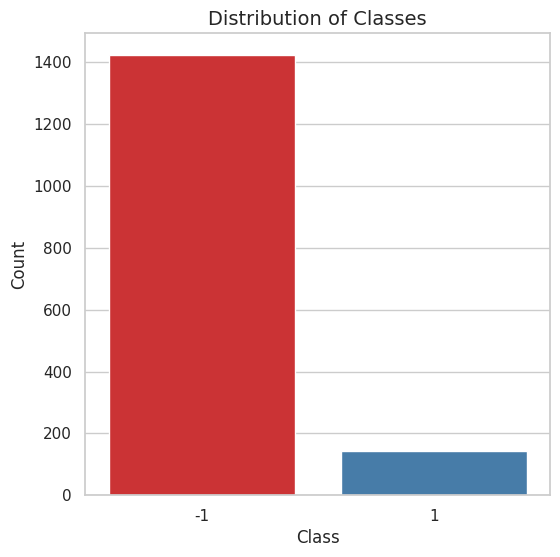

In [122]:
sns.set(style="whitegrid")

# Assuming train_data is a DataFrame with a column named 'Class'
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=train_data, palette='Set1')

# Adding labels and title
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Classes', fontsize=14)

# Display the histogram
plt.show()

In [90]:
Counter(train_data['Class'])

Counter({'-1': 1423, '1': 142})

In [91]:
# Oversampling the imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy = 'minority', random_state=42)
X = train_data['peptide']
X = list(X)

y = train_data['Class']
y = y.astype(int)
y = np.where(y < 0, 0, y)
y.reshape(-1,1)

X_resampled ,y_resampled = oversampler.fit_resample(X,y)


In [92]:
print(Counter(y_resampled))

Counter({0: 1423, 1: 1423})


<ipython-input-93-bd416f2d7d6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data['Class'], ax=axes[0], palette='viridis')
<ipython-input-93-bd416f2d7d6d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, ax=axes[1], palette='viridis')


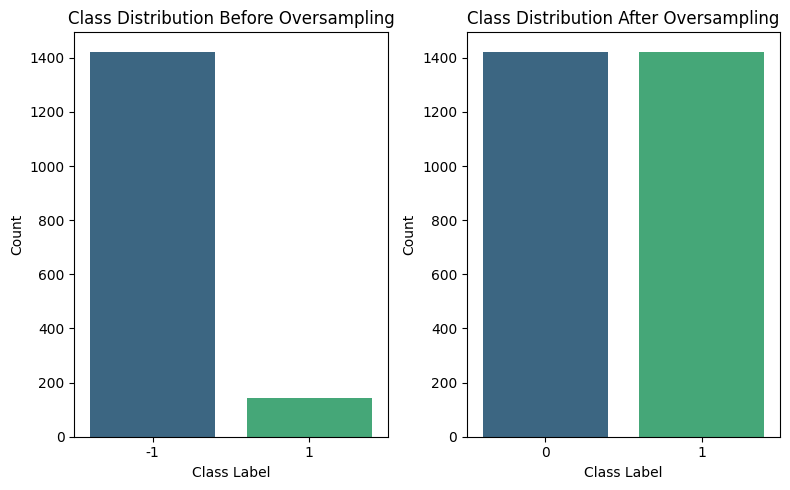

In [93]:
#before oversampling
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
sns.countplot(x=train_data['Class'], ax=axes[0], palette='viridis')
axes[0].set_title('Class Distribution Before Oversampling')
axes[0].set_xlabel('Class Label')
axes[0].set_ylabel('Count')

#class distribution after oversampling
sns.countplot(x=y_resampled, ax=axes[1], palette='viridis')
axes[1].set_title('Class Distribution After Oversampling')
axes[1].set_xlabel('Class Label')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [94]:
len(train_data['peptide'][1])

26

In [95]:
train_data.drop(columns = ['Peptide'])

,Class,peptide
0,-1,"[1, 0, 0, 1, 2, 3, 1, 0, 0, 0, 2, 2, 0, 1, 0, ..."
1,-1,"[6, 0, 1, 2, 0, 6, 4, 2, 0, 0, 1, 6, 2, 1, 0, ..."
2,-1,"[4, 0, 0, 2, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, ..."
3,-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 5, 0, 0, 0, ..."
4,-1,"[2, 0, 1, 0, 2, 1, 5, 1, 0, 0, 1, 3, 0, 1, 0, ..."
...,...,...
1560,-1,"[1, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1561,1,"[0, 0, 0, 0, 0, 4, 3, 2, 2, 0, 1, 0, 0, 0, 0, ..."
1562,1,"[1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, ..."
1563,-1,"[1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 1, 0, ..."


In [96]:
def Sigmoid(Z):
    return 1/(1+np.exp(-Z))

def Relu(Z):
    return np.maximum(0,Z)

def dRelu2(dZ, Z):
    dZ[Z <= 0] = 0
    return dZ

def dRelu(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def dSigmoid(Z):
    s = 1/(1+np.exp(-Z))
    dZ = s * (1-s)
    return dZ

class dlnet:
    def __init__(self, x, y):
        self.debug = 0;
        self.X=x
        self.Y=y
        self.Yh=np.zeros((1,self.Y.shape[1]))
        self.L=2
        self.dims = [9, 15, 1]
        self.param = {}
        self.ch = {}
        self.grad = {}
        self.loss = []
        self.lr=0.003
        self.sam = self.Y.shape[1]
        self.threshold=0.5

    def nInit(self):
        np.random.seed(1)
        self.param['W1'] = np.random.randn(self.dims[1], self.dims[0]) / np.sqrt(self.dims[0])
        self.param['b1'] = np.zeros((self.dims[1], 1))
        self.param['W2'] = np.random.randn(self.dims[2], self.dims[1]) / np.sqrt(self.dims[1])
        self.param['b2'] = np.zeros((self.dims[2], 1))
        return

    def forward(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        self.Yh=A2
        loss=self.nloss(A2)
        return self.Yh, np.mean(loss)

    def nloss(self,Yh):
        loss = (1./self.sam) * (-np.dot(self.Y,np.log(Yh).T) - np.dot(1-self.Y, np.log(1-Yh).T))
        return loss

    def backward(self):
        dLoss_Yh = - (np.divide(self.Y, self.Yh ) - np.divide(1 - self.Y, 1 - self.Yh))

        dLoss_Z2 = dLoss_Yh * dSigmoid(self.ch['Z2'])
        dLoss_A1 = np.dot(self.param["W2"].T,dLoss_Z2)
        dLoss_W2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2,self.ch['A1'].T)
        dLoss_b2 = 1./self.ch['A1'].shape[1] * np.dot(dLoss_Z2, np.ones([dLoss_Z2.shape[1],1]))

        dLoss_Z1 = dLoss_A1 * dRelu(self.ch['Z1'])
        dLoss_A0 = np.dot(self.param["W1"].T,dLoss_Z1)
        dLoss_W1 = 1./self.X.shape[1] * np.dot(dLoss_Z1,self.X.T)
        dLoss_b1 = 1./self.X.shape[1] * np.dot(dLoss_Z1, np.ones([dLoss_Z1.shape[1],1]))

        self.param["W1"] = self.param["W1"] - self.lr * dLoss_W1
        self.param["b1"] = self.param["b1"] - self.lr * dLoss_b1
        self.param["W2"] = self.param["W2"] - self.lr * dLoss_W2
        self.param["b2"] = self.param["b2"] - self.lr * dLoss_b2

        return


    def pred(self,x, y):
        self.X=x
        self.Y=y
        comp = np.zeros((1,x.shape[1]))
        pred, loss= self.forward()

        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0

        print("Accuracy: " + str(np.sum((comp == y)/x.shape[1])))

        return comp

    def gd(self,X, Y, iter = 3000):
        np.random.seed(1)

        self.nInit()

        for i in range(0, iter):
            Yh, loss=self.forward()
            self.backward()
            if i % 1000 == 0:

                print(f"Loss after iteration {i} : {loss}" )
                self.loss.append(loss)

        plt.plot(np.squeeze(self.loss))
        plt.ylabel('Loss')
        plt.xlabel('Epochs')
        plt.title("Loss over Epochs")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

        return

    def forward_test(self):
        Z1 = self.param['W1'].dot(self.X) + self.param['b1']
        A1 = Relu(Z1)
        self.ch['Z1'],self.ch['A1']=Z1,A1

        Z2 = self.param['W2'].dot(A1) + self.param['b2']
        A2 = Sigmoid(Z2)
        self.ch['Z2'],self.ch['A2']=Z2,A2

        self.Yh=A2
        return self.Yh

    def predict_test(self,x):
        self.X=x
        comp = np.zeros((1,x.shape[1]))
        pred = self.forward_test()
        for i in range(0, pred.shape[1]):
            if pred[0,i] > self.threshold: comp[0,i] = 1
            else: comp[0,i] = 0

        return comp

In [97]:
x_train = l1[0:1200]
x_val = l1[1201:1564]
y_train = train_data.iloc[0:1200,0].values
y_val = train_data.iloc[1201:1564,0].values

x_train = np.asarray(x_train).T
x_val = np.asarray(x_val).T

y_train = y_train.astype(int)
y_val = y_val.astype(int)
y_train = np.where(y_train<0, 0, y_train)
y_val = np.where(y_val<0, 0, y_val)

y_train = np.reshape(y_train,(1,-1))
y_train = np.reshape(y_train,(1,-1))


In [98]:
nn = dlnet(x_train,y_train)
nn.lr = 0.07
nn.dims = [26, 15, 2]

Loss after iteration 0 : 0.868639185680336
Loss after iteration 1000 : 0.07607193038170315
Loss after iteration 2000 : 0.06274221363907492
Loss after iteration 3000 : 0.045834094707920756
Loss after iteration 4000 : 0.032084899324192326
Loss after iteration 5000 : 0.0233545126540425
Loss after iteration 6000 : 0.017526986683434956
Loss after iteration 7000 : 0.013688618938917853
Loss after iteration 8000 : 0.01096191068250636
Loss after iteration 9000 : 0.008959933080706854
Loss after iteration 10000 : 0.007397380138005049
Loss after iteration 11000 : 0.006163221140273803
Loss after iteration 12000 : 0.0052278373321259786
Loss after iteration 13000 : 0.004502887819444343
Loss after iteration 14000 : 0.0039188836763582565
Loss after iteration 15000 : 0.0034548466083982156
Loss after iteration 16000 : 0.0030798248196171277
Loss after iteration 17000 : 0.00276659662266341
Loss after iteration 18000 : 0.002506664162662993
Loss after iteration 19000 : 0.002285495702662424
Loss after iterati

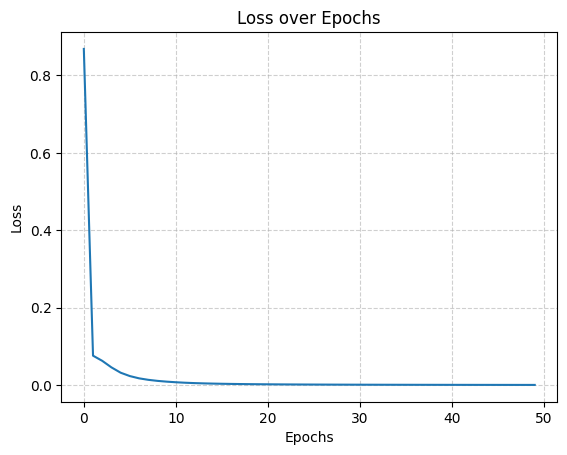

In [99]:
nn.gd(x_train, y_train, iter = 50000)

In [100]:
pred_train = nn.pred(x_train, y_train)
pred_test = nn.pred(x_val, y_val)

Accuracy: 1.0
Accuracy: 0.977961432506887


In [101]:
nn.X,nn.Y= x_val, y_val
yvalh, loss = nn.forward()
print("\ny",np.around(y_val[0:100], decimals=0).astype(np.int))
print("\nyh",np.around(yvalh[0,0:100,], decimals=0).astype(np.int),"\n")


y [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

yh [0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0] 



<ipython-input-101-57c9e74dafa3>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  print("\ny",np.around(y_val[0:100], decimals=0).astype(np.int))
<ipython-input-101-57c9e74dafa3>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.


In [102]:
test_data.columns = ['Peptide']
test_data.head()

,Peptide
0,KPTNAYEFGQVLSTISARKDEEACAHL
1,FLTAGDPDLETTRQALLALDREGADLIELGVPYS
2,RIVQRIKDFLRNLVPRTES
3,ERWAPARSQAYLGVL
4,FSFEGRRRALQAQEGIAALRDN


In [103]:
dict_val = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,'W':0,'X':0,'Y':0,'Z':0}
for i in range(0,len(test_data)):
    for j in test_data['Peptide'][i]:
        if j not in dict_val:
            dict_val[j] = 1
        else:
            dict_val[j] += 1

print(dict_val)

{'A': 695, 'B': 1, 'C': 115, 'D': 481, 'E': 625, 'F': 373, 'G': 672, 'H': 235, 'I': 601, 'J': 0, 'K': 629, 'L': 913, 'M': 192, 'N': 389, 'O': 0, 'P': 409, 'Q': 358, 'R': 713, 'S': 571, 'T': 456, 'U': 0, 'V': 651, 'W': 140, 'X': 0, 'Y': 285, 'Z': 3}


In [104]:
l3 = []
for i in range(0,len(test_data)):
    dict2 = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0,'N':0,'O':0,'P':0,'Q':0,'R':0,'S':0,'T':0,'U':0,'V':0,'W':0,'X':0,'Y':0,'Z':0}
    for j in test_data['Peptide'][i]:
        if j not in dict2:
            dict2[j] = 1
        else:
            dict2[j] += 1
    str1=[]
    for k in dict2.values():

            str1.append(int(k))
    l3.append(np.asarray(str1))

In [105]:
test_data['peptide'] = l3
test_data.head(10)


,Peptide,peptide
0,KPTNAYEFGQVLSTISARKDEEACAHL,"[4, 0, 1, 1, 3, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, ..."
1,FLTAGDPDLETTRQALLALDREGADLIELGVPYS,"[4, 0, 0, 4, 3, 1, 3, 0, 1, 0, 0, 7, 0, 0, 0, ..."
2,RIVQRIKDFLRNLVPRTES,"[0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, ..."
3,ERWAPARSQAYLGVL,"[3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, ..."
4,FSFEGRRRALQAQEGIAALRDN,"[4, 0, 0, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, ..."
5,LKAFDHRILDQSTG,"[1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 2, 0, 0, 0, ..."
6,GRFKRFRKKFKKLFKKLSPVIPLLHL,"[0, 0, 0, 0, 0, 4, 1, 1, 1, 0, 7, 5, 0, 0, 0, ..."
7,LLANYISGIIEPIQSRVVMIRFNPLPKEAVISRLRYIAENEG,"[3, 0, 0, 0, 4, 1, 2, 0, 7, 0, 1, 4, 1, 3, 0, ..."
8,SLVRTAL,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ..."
9,TFFRLFNRSGGGFKKFWKWFRRF,"[0, 0, 0, 0, 0, 7, 3, 0, 0, 0, 3, 1, 0, 1, 0, ..."


In [106]:
test_data.shape

(392, 2)

In [107]:
test_vals = test_data['peptide']
test_vals = np.array(test_vals).T
test_vals.shape

(392,)

In [108]:
a=[]
x = pd.DataFrame()
for i in test_vals:

    x= pd.concat([x,pd.DataFrame(i).T])


In [109]:
len(x.values[0])

26

In [110]:
y_pred = nn.predict_test(x.values.T)[0]

In [111]:
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
y_pred = np.where(y_pred == 0, -1, y_pred)
with open('prediction.txt','w+') as file:
    for i in y_pred:
        file.write("%s\n" % int(i))